In [1]:
import numpy as np
import tensorflowjs as tfjs
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

2023-02-22 17:00:28.449372: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# MNIST with simple DNN

In [2]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Shape of the MNIST image is 28 x 28px
model.add(Dense(512, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])

In [3]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train / 255.0).astype("float32")  # Convert from 64-bits to 32 bits.
X_test = (X_test / 255.0).astype("float32")

Note the normalization of the integer (pixes 0-255 to 0-1.0) and the conversion from 64-bits to 32-bits.
See [here](basics/001_about_numpy.ipynb) to understand why we cast the type.

In [4]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 12ms/step - loss: 0.1817 - acc: 0.9444
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0815 - acc: 0.9746
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0552 - acc: 0.9823
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0442 - acc: 0.9862
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0360 - acc: 0.9882
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0298 - acc: 0.9905
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0254 - acc: 0.9920
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0241 - acc: 0.9930
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0203 - acc: 0.9939
Epoch 10/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0174 - acc: 0.9944


In [6]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1046 - acc: 0.9805


[0.10456586629152298, 0.9804999828338623]

In [6]:
# Save to tensorflow.js compatible model format.
tfjs.converters.save_keras_model(model, "model")

In [7]:
import matplotlib.pyplot as plt

In [8]:
# The test data is a 28 x 28px pixels image.
X_test[0].shape

(28, 28)

(<matplotlib.image.AxesImage at 0x12f3ac910>, 7)

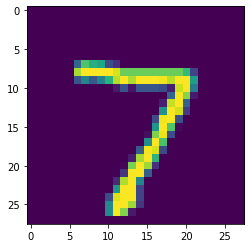

In [21]:
plt.imshow(X_test[0]), y_test[0]

In [41]:
y_pred = model.predict(np.array([X_test[0]]))
y_pred

array([[3.1793539e-21, 1.3493487e-14, 5.3128968e-19, 3.9093845e-12,
        1.7087958e-16, 3.0913651e-22, 1.1455523e-23, 1.0000000e+00,
        7.0237238e-18, 3.3932559e-12]], dtype=float32)

In [42]:
np.argmax(y_pred)

7

# MNIST with simple CNN

In [43]:
import numpy as np
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [44]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])

In [45]:
# Use 10% of training data for validation - not trained on.
model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 15s 8ms/step - loss: 0.2426 - acc: 0.9324 - val_loss: 0.0909 - val_acc: 0.9742
Epoch 2/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0882 - acc: 0.9744 - val_loss: 0.0682 - val_acc: 0.9818
Epoch 3/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0662 - acc: 0.9804 - val_loss: 0.0585 - val_acc: 0.9822
Epoch 4/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0545 - acc: 0.9837 - val_loss: 0.0695 - val_acc: 0.9808
Epoch 5/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0455 - acc: 0.9861 - val_loss: 0.0549 - val_acc: 0.9855
Epoch 6/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0392 - acc: 0.9882 - val_loss: 0.0503 - val_acc: 0.9872
Epoch 7/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0336 - acc: 0.9897 - val_loss: 0.0513 - val_acc: 0.9857
Epoch 8/10
1688/1688 [=============================

In [46]:
loss, acc = model.evaluate(X_test, y_test)
loss, acc

313/313 [==============================] - 2s 5ms/step - loss: 0.0564 - acc: 0.9830


(0.05636397749185562, 0.9829999804496765)

In [47]:
y_pred = model.predict(np.array([X_test[0]]))
y_pred

array([[2.2540612e-11, 4.9295686e-08, 1.0635391e-08, 1.1779280e-06,
        8.1794259e-12, 2.5191283e-11, 6.1459491e-18, 9.9999881e-01,
        6.1119012e-09, 4.8737736e-08]], dtype=float32)

In [49]:
np.argmax(y_pred)

7